# Analysis

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
tweet_json_cleaned=pd.read_csv('twitter_archive_master.csv')
tweet_json_cleaned['timestamp'] = pd.to_datetime(tweet_json_cleaned['timestamp'],utc=True)


### Analyzing timestamp

First the column timestamp is formatted as UTC, I transfer the timestamp into an reasonable timezone 'America/New_York'.It looks like @dog_rates is living in United States.

In [3]:
tweet_json_cleaned['local_timestamp']=tweet_json_cleaned['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')

Extract hour from timestramp and visualize the hour against number of tweets.

In [4]:
tweet_json_cleaned['hour']=tweet_json_cleaned['local_timestamp'].apply(lambda x : x.hour)

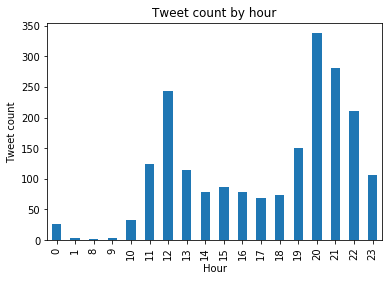

In [5]:
tweet_json_cleaned['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Tweet count by hour')
plt.xlabel('Hour')
plt.ylabel('Tweet count')
plt.show()

The plot shows @dog_rates preferred to sent a tweet at late morning and early evening, and never sent a tweet bewteen 2AM to 7AM at Eastern Time, perhaps he/she was sleeping during this period. It's also possible that @dog_rates is living in Central Time Zone, so the inactive time is 1AM to 6AM.

### Correlation between favorite_count and retweet_count.

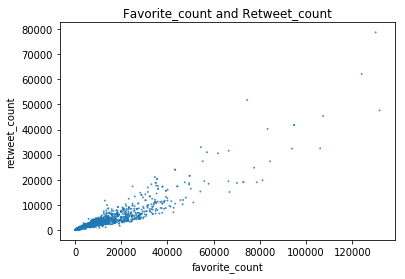

In [6]:
plt.scatter(tweet_json_cleaned['favorite_count'],tweet_json_cleaned['retweet_count'],s=[1,1],alpha=0.7)
plt.title('Favorite_count and Retweet_count')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.show()

It seems favorite_count and retweet_count have a linear correlation and the variance increases. The favorite_count is almost always larger than the retweet_count. That makes sense because the action of clicking favorite is easier than retweeting a tweet in Twitter.

### Time series on favorite_count and retweet_count

In [7]:
tweet_json_cleaned1=tweet_json_cleaned.copy()
tweet_json_cleaned1.set_index('local_timestamp',inplace=True)

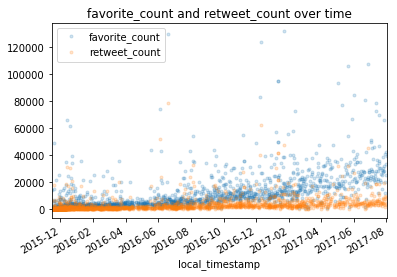

In [8]:
tweet_json_cleaned1[['favorite_count','retweet_count']].plot(style='.',alpha=0.2)
# plt.xlim(0,  40000)

plt.title('favorite_count and retweet_count over time')
# plt.xlabel('favorite_count')
# plt.ylabel('retweet_count')
plt.show()

The number of favorite and retweet per tweet is continuously increasing over time elapsed.

### Correlation between rating and timestamp

I would consider rating_numerator within range 0-15 is an valid rating, other large integer rating is just a joke. The rating_denominator is either 10 or a joke, so I would like to disregard rating_denominator.

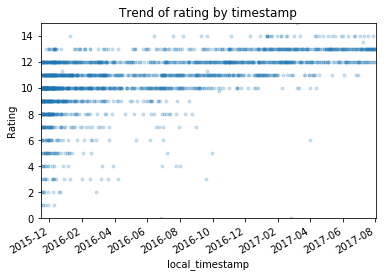

In [9]:
tweet_json_cleaned1['rating_numerator'].plot(style='.',alpha=0.2)
# plt.xlim(0,  40000)
plt.ylim(0, 15)
plt.title('Trend of rating by timestamp')
plt.ylabel('Rating')
plt.show()

It looks like @dog_rates tended to rate higher as fans grow. Eventually, the common rating converges to either 10,11,12,13,14 so these numbers become meaningless. 

### Correlation between dog stage and ratings.

I am interested whether the dog stage is correlated to the ratings.

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


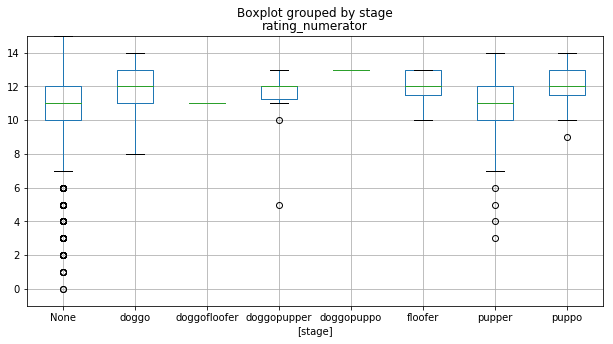

In [10]:
tweet_json_cleaned.boxplot(column=['rating_numerator'], by=['stage'],figsize=(10,5))
plt.ylim(-1, 15)
plt.show()

Looks like @dog_rates tends to rate higher on floofer and puppo. The pupper dogs are getting lower rates than other dog stage, with a distribution similar to the dogs without any stage.

### Top predicted dog breed 

Let's see the predicted dog breed distribution.

In [11]:
tweet_json_cleaned2=tweet_json_cleaned.groupby('breed_predict').filter(lambda x: len(x) >= 10)

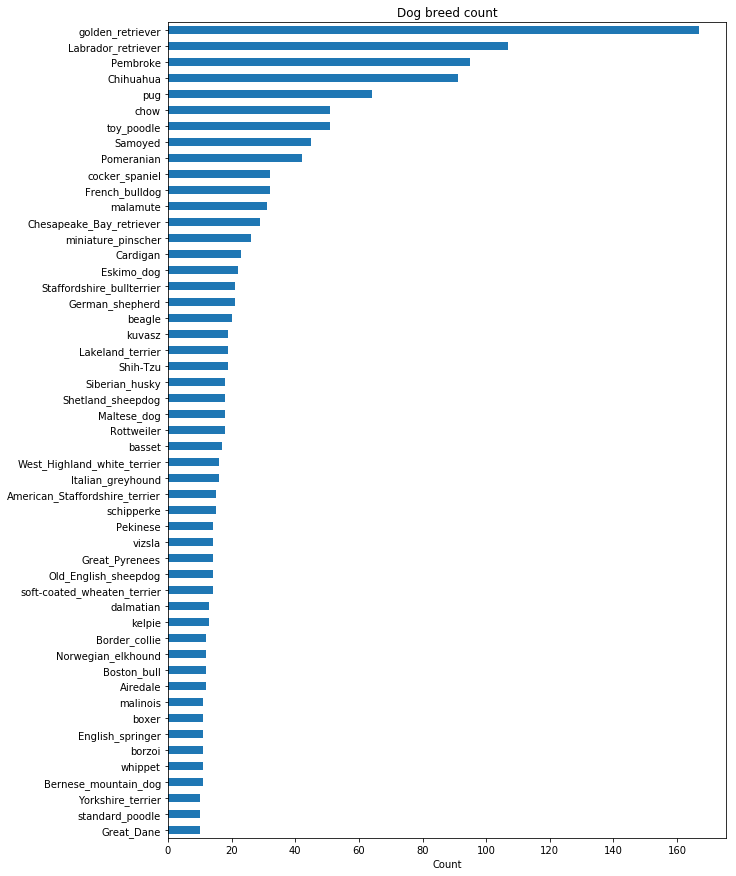

In [12]:
tweet_json_cleaned2['breed_predict'].value_counts(ascending=True).plot(kind='barh',figsize=(10,15))
plt.title('Dog breed count')
plt.xlabel('Count')
plt.show()

The dog breed prediction model predicts golden retrievers are the most common dogs that @dog_rates publishes. I think the distribution reflects these top breeds are also top popular or favorite dogs people adopt.

In [14]:
#tweet_json_cleaned3=tweet_json_cleaned2.groupby('breed_predict').median()
#tweet_json_cleaned3['rating_numerator']